In [174]:
# importamos la las librerias que necesitaremos

import pandas as pd
import numpy as np

## Ejercicio 4.3 (1 Punto)

Conseguimos el Dataset de Auto MPG https://archive.ics.uci.edu/ml/datasets/auto+mpg
que contiene datos del consumo de combustible de diversos modelos de coches.

In [175]:
# importamos los datos
# pd.read_csv('auto-mpg.data',delim_whitespace=True,header =None)
autos = pd.read_csv('auto-mpg.data',delim_whitespace=True,header = None)
nombres = ["mpg","cylinders","displacement","horsepower",
           "weight","acceleration","model year","origin","car name"]

# reasinamos los nombres
autos.columns = nombres

autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## 4.3.1 ¿Qué coche pesa más de 5000 kg?

In [176]:
autos[autos["weight"]>5000]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
44,13.0,8,400.0,175.0,5140.0,12.0,71,1,pontiac safari (sw)


## 4.3.2 ¿Cuál es el número de cilindros más frecuente en los coches que son del año 76?

In [177]:
# filtramos el year
frecuencias = autos[autos['model year'] == 76]

# luego contamos los elementos de cada colindroo y tomamos el maximo
frecuencias['cylinders'].value_counts()

4    15
6    10
8     9
Name: cylinders, dtype: int64

## 4.3.3 Compara el consumo medio de los coches fabricados en el año 70 con los del año 79 y calcula la diferencia.

In [178]:
# filtramos por modelo de anio, luego seleccionamos los consumos y sacamos la media
media_70 = autos[autos['model year'] == 70]['mpg'].mean()
media_79 = autos[autos['model year'] == 79]['mpg'].mean()

# diferencia entre medias

media_70-media_79

# si el numero es negativo, implica que en el anio 79 consume mas, sino, en el 70 se consume mas por galon

-7.403448275862058

## 4.3.4 Identifica las variables que contienen valores nulos (missing values) en caso que haya alguno.

In [179]:
autos.describe(include='all') # con esto notamos que hay una variable que deberia ser continuo...

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [180]:
# la convertimos a numerica con

autos['horsepower'] = pd.to_numeric(autos['horsepower'], errors='coerce')

# ahora ya podemos conseguir los nan de forma general(cualquier columna) con la siguiente instruccion

autos[autos.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


## 4.3.5 Consigue un DataFrame de aquellos registros que tengan algún valor nulo (NaN), filtrando el DataFrame original.

In [181]:
# ahora ya podemos conseguir los nan de forma general(cualquier columna) con la siguiente instruccion

autos_con_nan = autos[autos.isna().any(axis=1)]
autos_con_nan

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


## 4.3.6 Calcula la frecuencia del número de cilindros entre los registros del DataFrame anterior (la tabla con valores perdidos).

In [182]:
# Procedemos como en la pregunta 4.3.2

autos_con_nan['cylinders'].value_counts()

4    5
6    1
Name: cylinders, dtype: int64

## 4.3.7 Crea un DataFrame de los modelos con 6 o más cilindros, que pesén más de 4000 kg y consumen menos o igual que 10 galón por milla, filtrando el dataset original.

In [183]:
# solo agregamos mas elementos dentro del filtro de la siguiente forma

autos[(autos['cylinders']>=6) & (autos['weight']>4000) & (autos['mpg']<=10)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250
26,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d


# Ejercicio 4.4 (1 Punto)

## 4.4.1 Ejecutando las siguientes celdas se obtienen dos DataFrames que contienen varias lecturas de datos metorológicos de diferentes ciudades en difrentes momentos del año. Concatena las dos tablas de forma básica.

In [184]:
from itertools import product

# meses
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
# Provincias/ciudades
provincias = ['Ciudad Autónoma de Melilla',
 'Comunitat Valenciana',
 'Aragón',
 'Galicia',
 'Cantabria',
 'País Vasco',
 'La Rioja',
 'Comunidad Foral de Navarra',
 'Comunidad de Madrid',
 'Andalucía',
 'Canarias',
 'Ciudad Autónoma de Ceuta',
 'Illes Balears',
 'Castilla y León',
 'Región de Murcia',
 'Principado de Asturias',
 'Extremadura',
 'Cataluña']

mix = ['Petrel',
'Sabadell',
'Cartagena',
'Cantabria',
'País Vasco',
'La Rioja',
'Comunidad Foral de Navarra',
'Comunidad de Madrid',
'Andalucía',
'Canarias',
'Ciudad Autónoma de Ceuta',
'Illes Balears',
'Andalusia',
'Canary Islands',
'Navarre' ,
'Valencia',
]

years = np.arange(1990, 2022, dtype=int)


# creamos el primer y el segundo dataframe

df1 = pd.DataFrame(list(product(provincias, years, meses)), columns=['Zona', 'years', 'meses'])
df1["temp"] = np.round(np.random.rand(len(provincias)*len(years)*len(meses))*100,2)
df2 = pd.DataFrame(list(product(mix, years, meses)), columns=['Zona', 'years', 'meses'])
df2["temp"] = np.round(np.random.rand(len(mix)*len(years)*len(meses))*100,2)

# para concatenarlos vectircalmente usamos

df1_y_df2 = pd.concat([df1, df2])
df1_y_df2

# habra que reindexar

,Zona,years,meses,temp
0,Ciudad Autónoma de Melilla,1990,enero,84.52
1,Ciudad Autónoma de Melilla,1990,febrero,95.20
2,Ciudad Autónoma de Melilla,1990,marzo,38.72
3,Ciudad Autónoma de Melilla,1990,abril,7.36
4,Ciudad Autónoma de Melilla,1990,mayo,85.44
...,...,...,...,...
6139,Valencia,2021,agosto,16.34
6140,Valencia,2021,septiembre,23.84
6141,Valencia,2021,octubre,69.39
6142,Valencia,2021,noviembre,26.54


## 4.4.2 Concatena las dos tablas solamente con la información que tengan en común.

In [185]:
# solo agregaremos las que tengas informacion de comun de ciudades

df1.merge(df2,how='inner',on=['Zona','years','meses'])

,Zona,years,meses,temp_x,temp_y
0,Cantabria,1990,enero,59.10,42.91
1,Cantabria,1990,febrero,5.27,46.26
2,Cantabria,1990,marzo,35.96,96.46
3,Cantabria,1990,abril,42.83,74.89
4,Cantabria,1990,mayo,16.19,29.09
...,...,...,...,...,...
3451,Illes Balears,2021,agosto,85.18,22.04
3452,Illes Balears,2021,septiembre,7.10,16.27
3453,Illes Balears,2021,octubre,24.08,52.33
3454,Illes Balears,2021,noviembre,59.17,25.56


## 4.4.3 A continuación viene otra celda para generar dos tablas que corresponden a número de aportaciones de cada desarrollador de un equipo de análisi de datos en diferentes versiones liberadas de una aplicación corporativa (Released versions). Concatena de forma básica los dos DataFrames y calcula el número de filas de la tabla concatenada.

In [186]:
desarrollador = ['a','b','c','d','e','f','g','h','i'] # otros desarrolladores
version = ['ver1','ver2','ver3','ver4','ver5','ver6'] # versiones
desarrollador2 = ['a','b','d','k','t','f','g','h','i','p','o','x.v'] # desarrolladores
version2 = ['ver1','ver10','ver3','ver98','ver5','ver6'] # otras versiones

equipo1 = pd.DataFrame(list(product(version,desarrollador)), columns=[ 'version', 'desarrolador'])
equipo1["aportaciones"] = np.random.randint(8,size=len(desarrollador)*len(version))

equipo2 = pd.DataFrame(list(product(version2,desarrollador2)), columns=[ 'version', 'desarrolador'])
equipo2["aportaciones"] = np.random.randint(13,size=len(desarrollador2)*len(version2))



In [187]:
# unimos

equipo1_y_equipo2 = pd.concat([equipo1, equipo2])
equipo1_y_equipo2.shape #dimensiones del dataframe resultate

(126, 3)

## 4.4.4 Realiza un merge con la unión de los dos DataFrames y calcula el número de filas de la tabla resultante.

In [188]:
equipo1.merge(equipo2,on=['version', 'desarrolador'],how='outer').shape

(98, 4)

## 4.4.5 Realiza un merge con la intersección. de los dos DataFrames y calcula el número de filas de la tabla resultante.

In [189]:
equipo1.merge(equipo2,on=['version', 'desarrolador'],how='inner').shape

(28, 4)

## 4.4.6 Volviendo al dataset de "Auto-MPG" usado en el ejercicio 4.3, genera de nuevo el DataFrame y después saca las medias de cada variable por año.

In [190]:
# importamos los datos
# pd.read_csv('auto-mpg.data',delim_whitespace=True,header =None)
autos = pd.read_csv('auto-mpg.data',delim_whitespace=True,header = None)
nombres = ["mpg","cylinders","displacement","horsepower",
           "weight","acceleration","model year","origin","car name"]

# reasinamos los nombres
autos.columns = nombres

# la convertimos a numerica con

autos['horsepower'] = pd.to_numeric(autos['horsepower'], errors='coerce')

autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [191]:
# agrupamos por anio y sacamos la medio

autos_years = autos.groupby('model year').mean()
autos_years

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
model year,,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,107.037037,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556,1.611111


## 4.4.7 Dibuja la evolución del valor medio de cada variable por año.

In [192]:
#improtamos matplotlib
import matplotlib.pyplot as plt

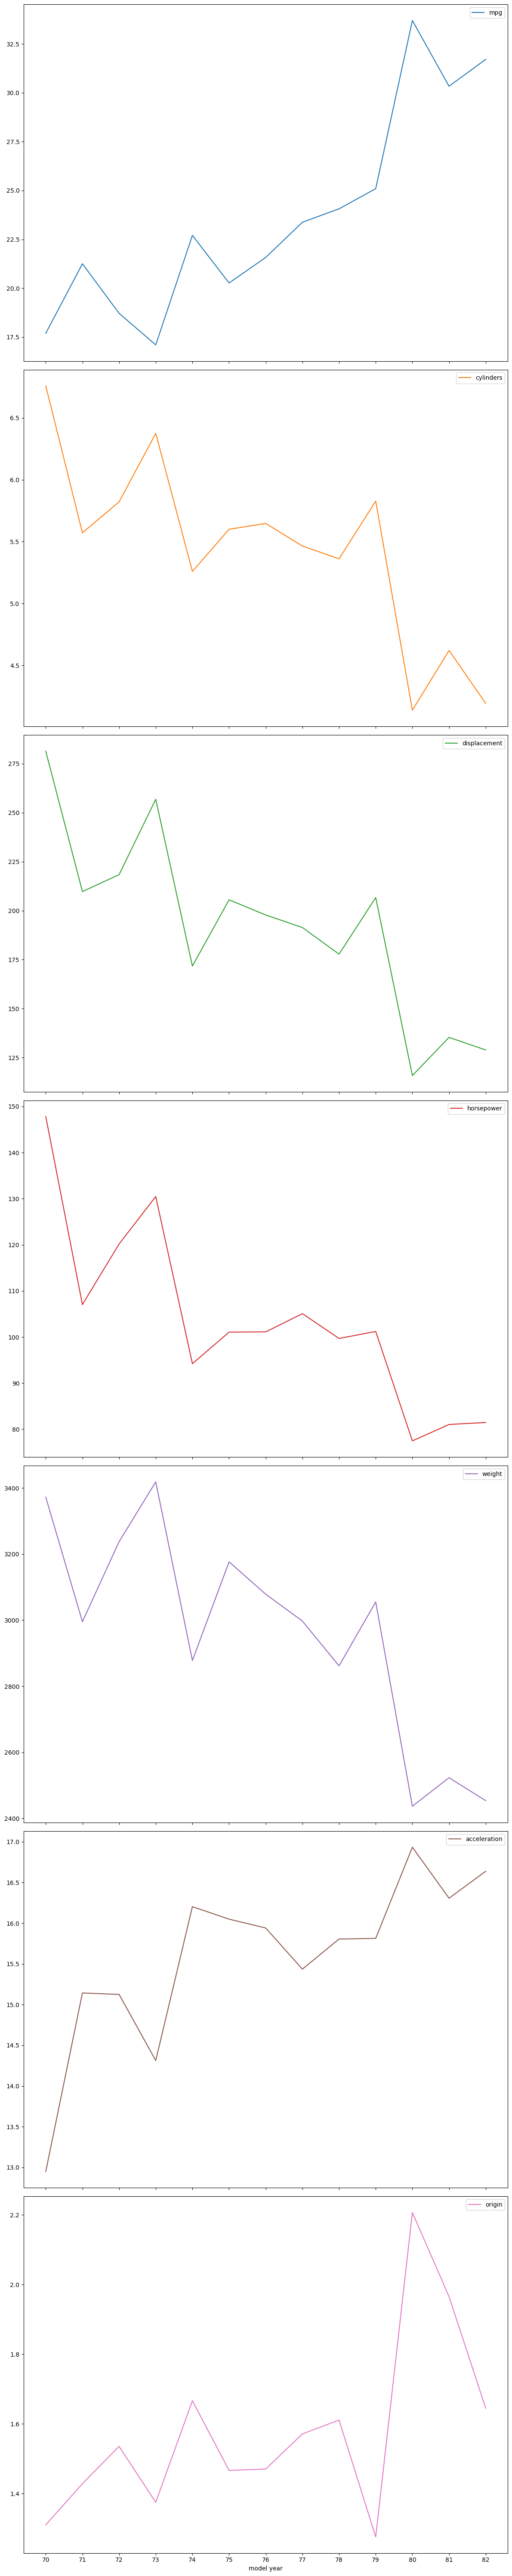

In [193]:
autos_years.plot(subplots=True,figsize=(12,60))
plt.xticks(np.arange(min(autos_years.index), max(autos_years.index)+1, 1.0))
plt.tight_layout()
plt.show()

## 4.4.8 Dibuja solamente la gráfica del peso medio de los coches a lo largo de los años.

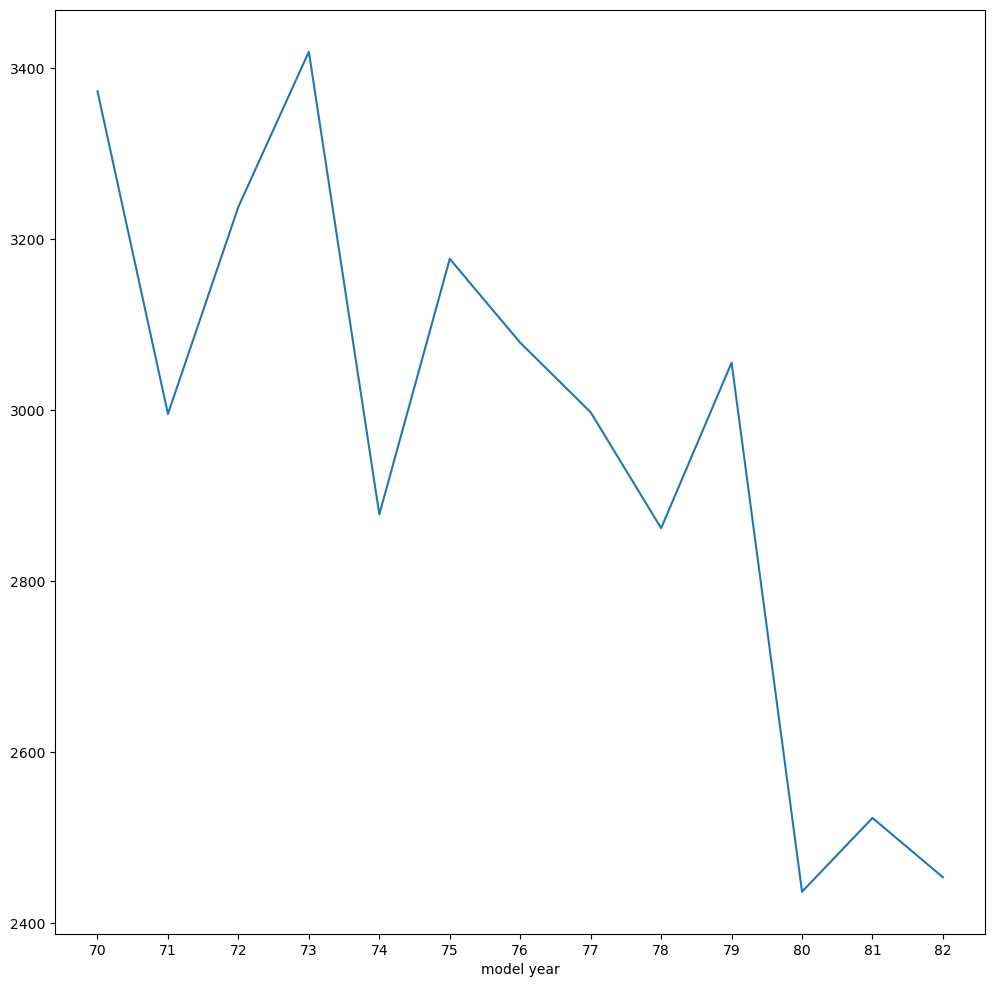

In [194]:
autos_years['weight'].plot(figsize=(12,12))
plt.xticks(np.arange(min(autos_years.index), max(autos_years.index)+1, 1.0))
plt.show()